## Implementação de Decision Tree Random Forest para classificar tipo de flores

In [29]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

#!pip install ipywidgets
#!pip3 install graphviz
#!pip3 install pydot

import pydot
import graphviz
from ipywidgets import interactive
from IPython.display import SVG,display
from graphviz import Source

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
os.environ["PATH"] += os.pathsep + 'C:/Users/Adrion/Desktop/IA Projects/Libs/Graphviz/bin'

import warnings
warnings.filterwarnings("ignore")

dfCollumns = ['sepal length','sepal width', 'petal length', 'petal width','class']
classes = ['Iris-setosa','Iris-versicolor','Iris-virginica']

### Funções auxiliares que serão usadas na execução

In [2]:
def calculateDivision(len):
    trainSize = round(0.75*len)
    testSize = len - trainSize
    return trainSize, testSize

def getTrainTestData(df):
    dfLen = len(df.index)
    trainSize, testSize = calculateDivision(dfLen)
    
    trainDf = df[0:trainSize-1].reset_index(drop = True)
    testDf = df[trainSize:dfLen].reset_index(drop = True)
    
    return trainDf, testDf

def getXY(df, dfCollumns):
    dfx = df[dfCollumns[0:len(dfCollumns) - 1]]
    dfy = df[[dfCollumns[-1]]]
    
    return dfx, dfy

def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements

### Criando dataframe com os dados da base de dados

In [3]:
df = pd.read_csv('Data/iris.data', sep=",", names=dfCollumns)
df = df.sample(frac=1).reset_index(drop=True)

### Dividindo dataframe em teste e treino

In [4]:
train, test = getTrainTestData(df)

trainX, trainY = getXY(train, dfCollumns)
testX, testY = getXY(test, dfCollumns)

### Execução da Decision Tree

In [5]:
clf = DecisionTreeClassifier()

clf = clf.fit(trainX,trainY)


for feature,importancia in zip(trainX.columns,clf.feature_importances_):
    print("{}:{}".format(feature, importancia))
    
predY = clf.predict(testX)

cm = confusion_matrix(predY, testY)

print("Acurácia da Decision Tree:",accuracy(cm))

print(metrics.classification_report(testY,predY))

sepal length:0.026378986866791722
sepal width:0.0
petal length:0.5705315822388994
petal width:0.40308943089430893
Acurácia da Decision Tree: 0.9473684210526315
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.80      0.89        10
 Iris-virginica       0.88      1.00      0.93        14

       accuracy                           0.95        38
      macro avg       0.96      0.93      0.94        38
   weighted avg       0.95      0.95      0.95        38



### Visualização da Árvore com parâmetros default

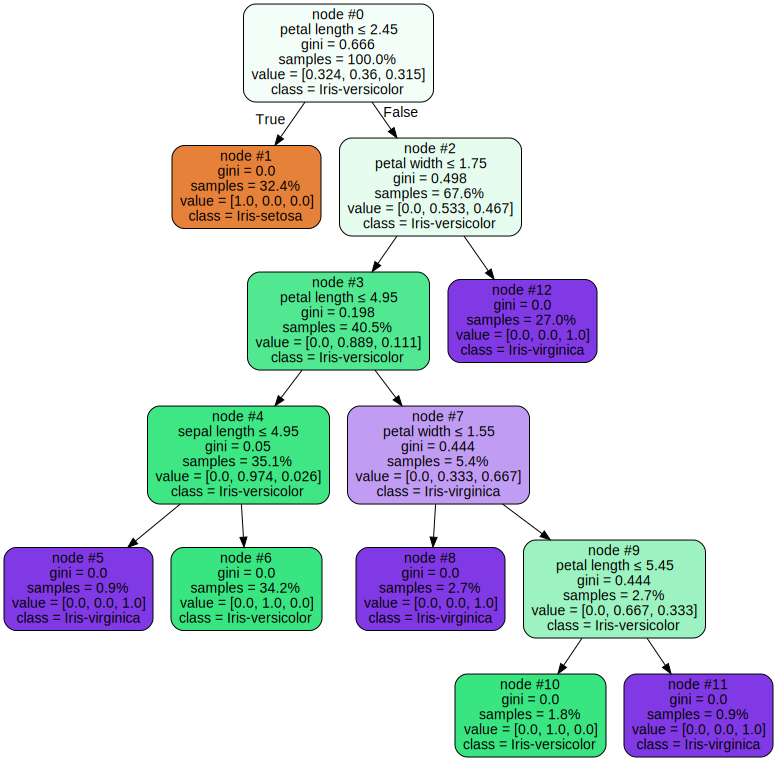

In [6]:
# Renderizando a árvore de forma gráfica:
dotfile = open("C:/Users/Adrion/Desktop/IA Projects/dtree2.dot", 'w')
dot_data = export_graphviz( 
         clf, 
         out_file=None,
         feature_names=df.drop('class',axis=1).columns,
         class_names=classes,  
         filled=True, rounded=True,
         proportion=True,
         node_ids=True,
         rotate=False,
         label='all',
         special_characters=True
        )
dotfile.close()

graph = graphviz.Source(dot_data)  
graph

### Visualização da árvore Interativa

Acurácia da Decision Tree: 0.631578947368421


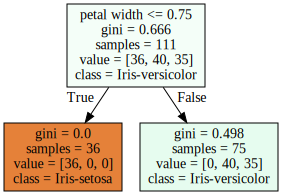

In [7]:
def plot_tree(crit, split, depth, min_samples_split, min_samples_leaf=0.2):
    estimator = DecisionTreeClassifier(
           random_state = 0 
          ,criterion = crit
          ,splitter = split
          ,max_depth = depth
          ,min_samples_split=min_samples_split
          ,min_samples_leaf=min_samples_leaf
    )
    estimator.fit(trainX, trainY)
    predY = estimator.predict(testX)
    cm = confusion_matrix(predY, testY)
    print("Acurácia da Decision Tree:",accuracy(cm))
    
    graph = Source(export_graphviz(estimator
      , out_file=None
      , feature_names=dfCollumns[0:4]
      , class_names=classes
      , impurity=True
      , filled = True))
    display(SVG(graph.pipe(format='svg')))
    return estimator

inter=interactive(plot_tree 
   , crit = ["gini", "entropy"]
   , split = ["best", "random"]
   , depth=[1,2,3,4,5,10,20,30]
   , min_samples_split=(1,5)
   , min_samples_leaf=(1,5))

display(inter)

### Visualização da Pior árvore gerada

Acurácia da Decision Tree: 0.6052631578947368


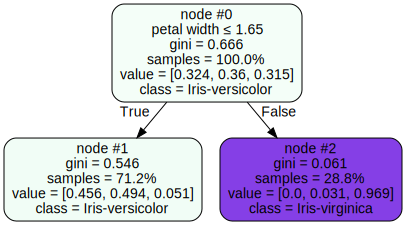

In [8]:
clf = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth = 1, min_samples_split=5, min_samples_leaf=5)
clf = clf.fit(trainX,trainY)

predY = clf.predict(testX)
cm = confusion_matrix(predY, testY)
print("Acurácia da Decision Tree:",accuracy(cm))

dot_data = export_graphviz( 
         clf, 
         out_file=None,
         feature_names=df.drop('class',axis=1).columns,
         class_names=classes,  
         filled=True, rounded=True,
         proportion=True,
         node_ids=True,
         rotate=False,
         label='all',
         special_characters=True
        )
graph = graphviz.Source(dot_data)  
graph

### Visualização da Melhor árvore gerada

Acurácia da Decision Tree: 0.9473684210526315


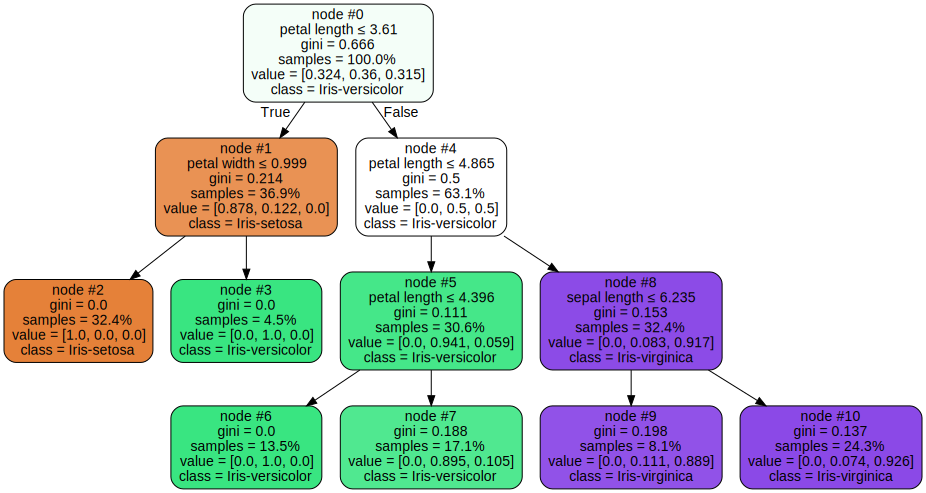

In [9]:
clf = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth = 3, min_samples_split=5, min_samples_leaf=5)
clf = clf.fit(trainX,trainY)

predY = clf.predict(testX)
cm = confusion_matrix(predY, testY)
print("Acurácia da Decision Tree:",accuracy(cm))

dot_data = export_graphviz( 
         clf, 
         out_file=None,
         feature_names=df.drop('class',axis=1).columns,
         class_names=classes,  
         filled=True, rounded=True,
         proportion=True,
         node_ids=True,
         rotate=False,
         label='all',
         special_characters=True
        )
graph = graphviz.Source(dot_data)  
graph

## Implementação das Random Forest

In [31]:
clf=RandomForestClassifier(n_estimators=100)

clf.fit(trainX,trainY)

predY=clf.predict(testX)

cm = confusion_matrix(predY, testY)
print("Acurácia da Random Forest:",accuracy(cm))

Acurácia da Random Forest: 0.9736842105263158


#### Variando o número de árvores

In [30]:
for i in range(100, 1100, 100):
    clf=RandomForestClassifier(n_estimators=100)

    clf.fit(trainX,trainY)

    predY=clf.predict(testX)

    cm = confusion_matrix(predY, testY)
    print("Acurácia para "+str(i)+" Árvores na Random Forest: ",accuracy(cm))
    

Acurácia para 100 Árvores na Random Forest:  0.9736842105263158
Acurácia para 200 Árvores na Random Forest:  0.9736842105263158
Acurácia para 300 Árvores na Random Forest:  0.9736842105263158
Acurácia para 400 Árvores na Random Forest:  0.9736842105263158
Acurácia para 500 Árvores na Random Forest:  0.9736842105263158
Acurácia para 600 Árvores na Random Forest:  0.9736842105263158
Acurácia para 700 Árvores na Random Forest:  0.9736842105263158
Acurácia para 800 Árvores na Random Forest:  0.9736842105263158
Acurácia para 900 Árvores na Random Forest:  0.9736842105263158
Acurácia para 1000 Árvores na Random Forest:  0.9736842105263158


#### Feature mais importantes

No handles with labels found to put in legend.


Acurácia da Decision Tree: 0.9736842105263158
petal length    0.462366
petal width     0.400567
sepal length    0.114622
sepal width     0.022445
dtype: float64


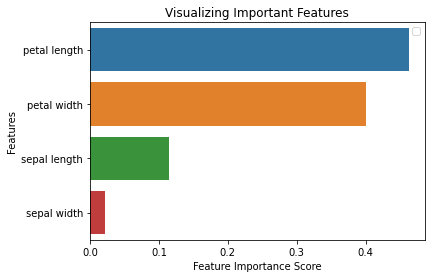

In [32]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(trainX,trainY)
predY=clf.predict(testX)

feature_imp = pd.Series(clf.feature_importances_,index=trainX.columns).sort_values(ascending=False)
print(feature_imp)

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

#### Realizando Feature Selection

In [41]:
newTrainX = trainX[['sepal length', 'petal length', 'petal width']]

newTestX = testX[['sepal length', 'petal length', 'petal width']]

clf=RandomForestClassifier(n_estimators=100)

clf.fit(newTrainX,trainY)

predY=clf.predict(newTestX)

cm = confusion_matrix(predY, testY)
print("Acurácia da Random Forest:",accuracy(cm))

feature_imp = pd.Series(clf.feature_importances_,index=newTrainX.columns).sort_values(ascending=False)
print(feature_imp)

Acurácia da Random Forest: 0.9736842105263158
petal length    0.422687
petal width     0.372117
sepal length    0.205196
dtype: float64


In [45]:
newTrainX = trainX[['petal length', 'petal width']]

newTestX = testX[['petal length', 'petal width']]

clf=RandomForestClassifier(n_estimators=100)

clf.fit(newTrainX,trainY)

predY=clf.predict(newTestX)

cm = confusion_matrix(predY, testY)
print("Acurácia da Random Forest:",accuracy(cm))

feature_imp = pd.Series(clf.feature_importances_,index=newTrainX.columns).sort_values(ascending=False)
print(feature_imp)

Acurácia da Random Forest: 0.9736842105263158
petal width     0.536178
petal length    0.463822
dtype: float64
